In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #visualisasi kata

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1


Mulai data understanding

In [ ]:
df.info()
# tipe sudah numerik semua

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
# melihat brp nilai kosong
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [ ]:
# melihat presentase  missing value
(df.isnull().sum()/len(df))*100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


In [ ]:
# akan dilakukan imputasi

In [ ]:
def count_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((data < lower_bound) | (data > upper_bound)).sum()
  #ketika data kurang dari batas bawah atau data lebih dari batas atas, maka dilakukan penambahan

# Count outliers in each numerical column
outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  outlier_counts[col] = count_outliers_iqr(df[col])

# Convert the results into a DataFrame form easier viewing
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()),
                                 columns = ['Column', 'Outlier Count'])

# Display the outlier counts DataFrame
outlier_counts_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,0
7,Age,16
8,Outcome,0


In [ ]:
 # melihat proporsi dari setiap label
 df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# Label 0 ada 500, label 1 ada 268

<Axes: xlabel='count', ylabel='Outcome'>

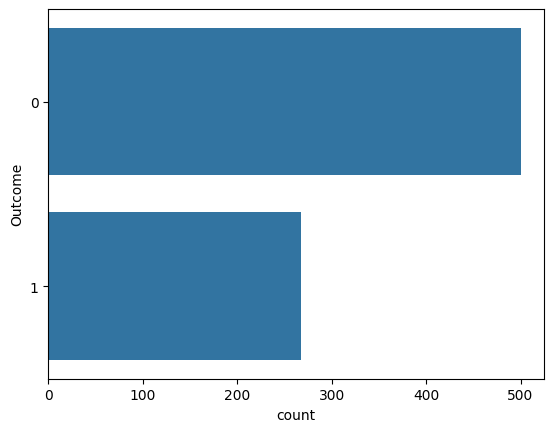

In [ ]:
# visualisasi dengan count plot
sns.countplot(data = df, y = 'Outcome')

EDA

Text(0.5, 0.98, 'Histograms of Pima Indian Diabetes Dataset Features')

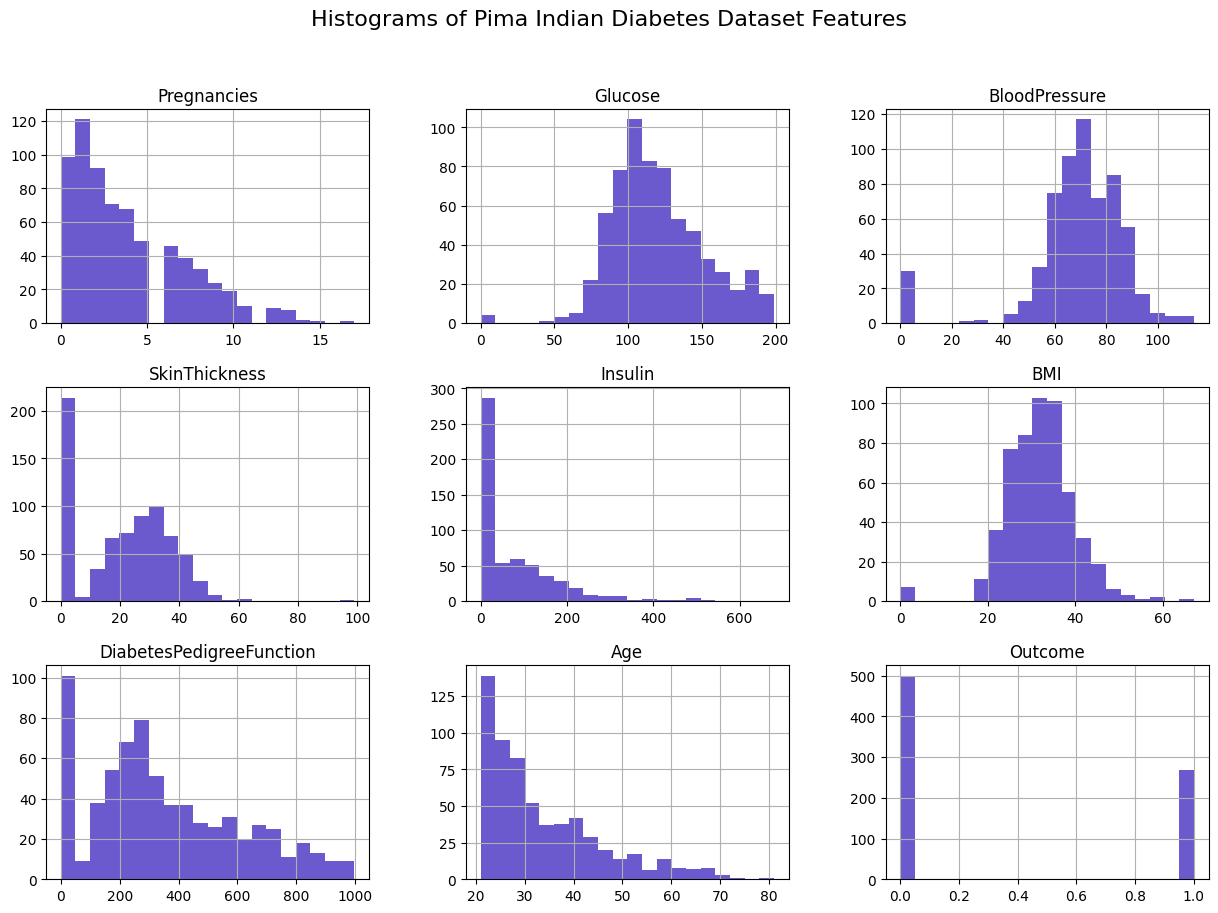

In [ ]:
df.hist(bins = 20, figsize = (15,10), layout = (3, 3),
         color = 'slateblue');
plt.suptitle('Histograms of Pima Indian Diabetes Dataset Features',
             fontsize = 16)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

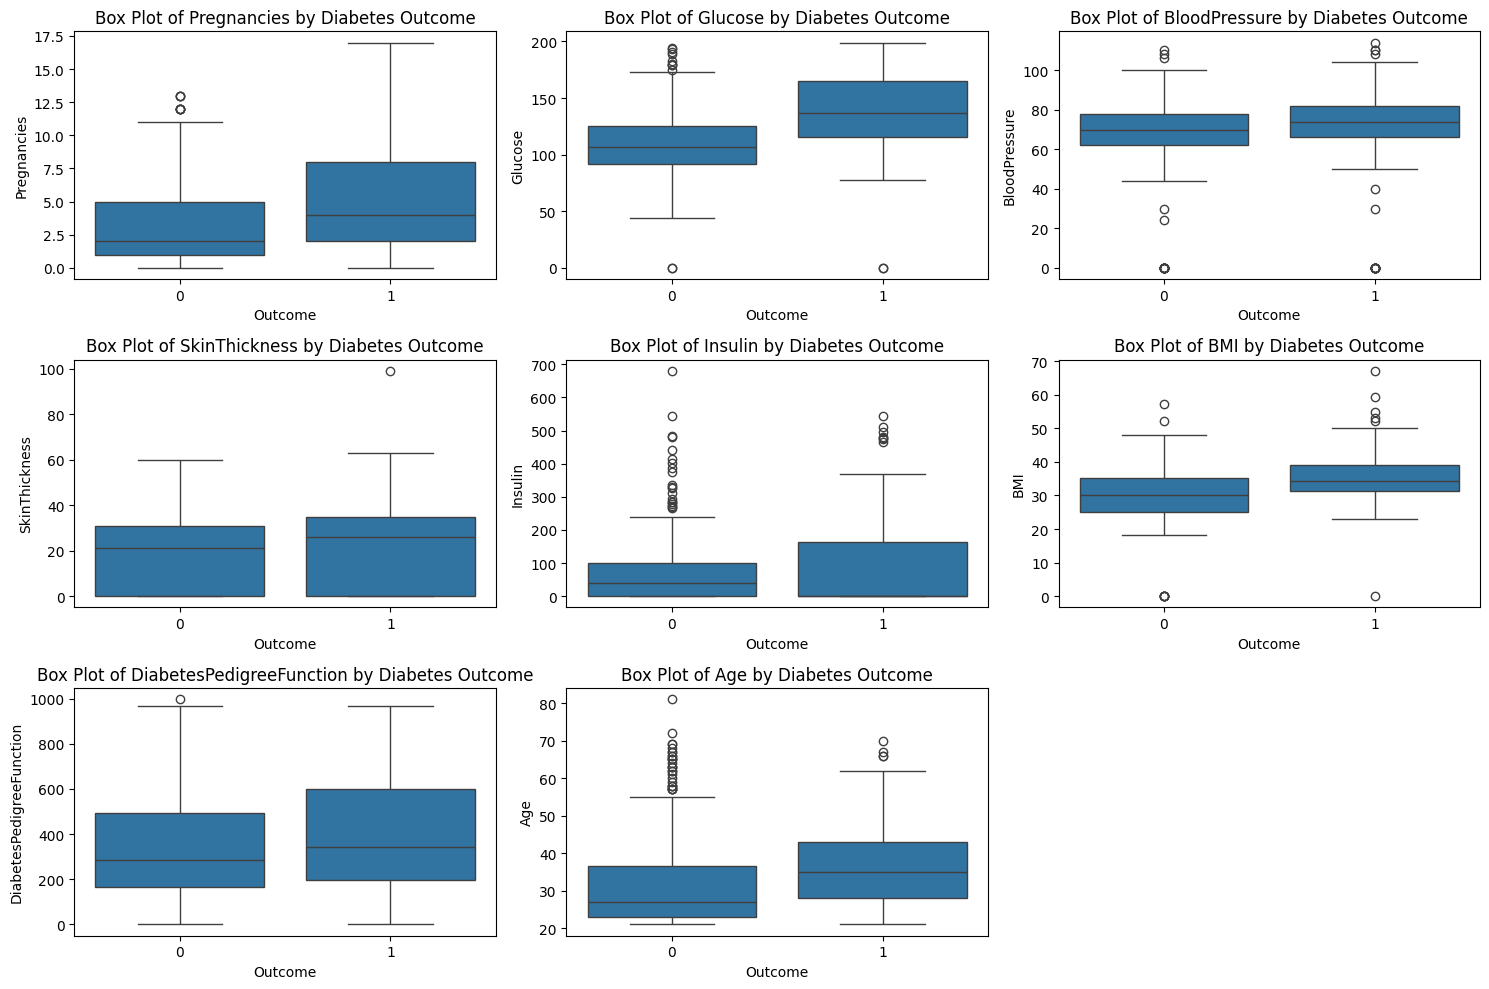

In [ ]:
# Visualisasi dengan boxplot
def plot_boxplots(data):
  plt.figure(figsize=(15, 10))
  for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = 'Outcome', y = column, data = data)
    plt.title(f'Box Plot of {column} by Diabetes Outcome')
  plt.tight_layout()
  plt.show()

plot_boxplots(df)

<Axes: >

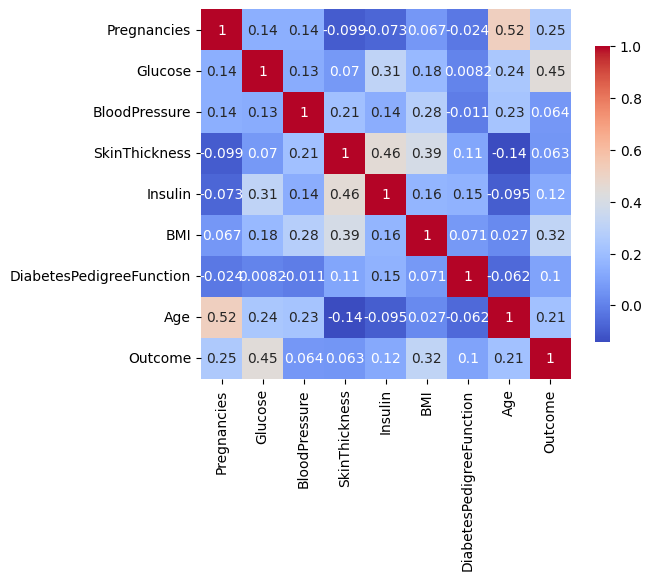

In [ ]:
# visualisasi heatmap utk melihat korelasi anatarvariabel
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm',
            square = True, cbar_kws = {"shrink": .8})

In [ ]:
df_text = pd.read_excel('foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


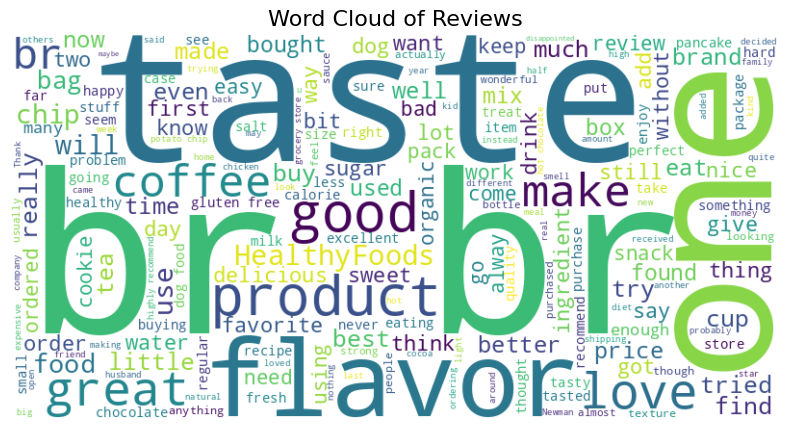

In [ ]:
# melakukan visualisasi
text = " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
  wordcloud = WordCloud(width = 800, height = 400,
                        background_color = 'white',
                        colormap = 'viridis').generate(text)

  plt.figure(figsize = (10, 5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.title("Word Cloud of Reviews", fontsize = 16)
  plt.show()

plot_wordcloud(text)

In [ ]:
# imputasi
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
#  setelah dilakukan imputasi, jumlah misisng value jadi 0
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome'] #simpan outcome dalam variabel y

In [ ]:
# resampling dengan teknik SMOTE
smote = SMOTE(random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

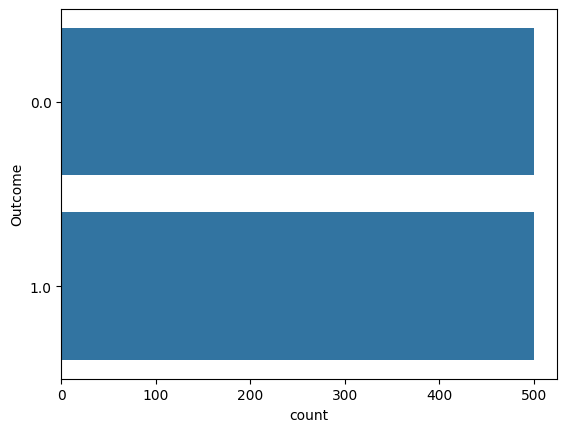

In [ ]:
# visualisasi data setelah resampling
sns.countplot(data = x_resampled, y = y_resampled)

In [ ]:
df.head(3)
#satuannya beda"

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,128.0,72.0,35.0,0.0,37.06,627.0,37.0,1.0
1,1.0,85.0,66.0,29.0,0.0,38.34,351.0,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.30,672.0,32.0,1.0


In [ ]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

In [ ]:
# setelah dilakukan scaling
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.629705,0.110153,0.168791,0.928501,-0.780592,0.627336,1.117130,0.330725
1,-0.965236,-1.336993,-0.167237,0.540429,-0.780592,0.822342,-0.001662,-0.250732
2,1.267682,1.961154,-0.279247,-1.335257,-0.780592,-1.468976,1.299541,-0.153822
